In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

from statsmodels.tsa.ar_model import AR,ARResults

df = pd.read_csv('tempandq.csv',index_col='date',parse_dates=True)
df.index.freq = 'D'

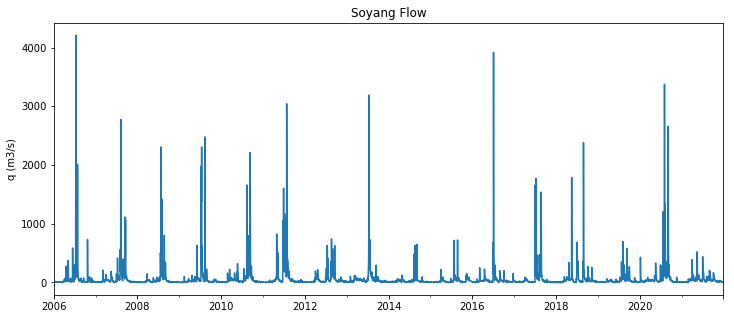

In [2]:
title='Soyang Flow'
ylabel='q (m3/s)'
xlabel='' 
ax = df['q'].plot(figsize=(12,5),title=title);
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [3]:
len(df)

5844

In [4]:
train = df.iloc[:4383] #2006-2017 -0.75*5844
test = df.iloc[4383:] #2018-2021

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
model = AR(train['q'])
AR1fit = model.fit(maxlag=1)
AR1fit.aic
print(f'Lag: {AR1fit.k_ar}')
print(f'Coefficients:\n{AR1fit.params}')

Lag: 1
Coefficients:
const    20.277516
L1.q      0.693910
dtype: float64


In [9]:
start=len(train)
end=len(train)+len(test)-1

predictions1 = AR1fit.predict(start=start, end=end, dynamic=False).rename('AR(1) Predictions')

In [10]:
for i in range(len(predictions1)):
    print(f"predicted={predictions1[i]:<11.10}, expected={test['q'][i]}")

predicted=20.47528001, expected=2.7030000000000003
predicted=34.48551612, expected=2.793
predicted=44.2073583 , expected=2.8939999999999997
predicted=50.95344127, expected=0.0
predicted=55.63461534, expected=0.0
predicted=58.88292859, expected=8.841000000000001
predicted=61.13696545, expected=3.292
predicted=62.70106406, expected=0.0
predicted=63.78640763, expected=3.4619999999999997
predicted=64.53953833, expected=0.0
predicted=65.06214321, expected=3.635
predicted=65.42478394, expected=0.0
predicted=65.67642395, expected=0.0
predicted=65.85103945, expected=3.983
predicted=65.97220689, expected=4.869
predicted=66.05628617, expected=0.0
predicted=66.11462963, expected=0.0
predicted=66.15511473, expected=10.707
predicted=66.18320775, expected=5.348
predicted=66.20270177, expected=0.003
predicted=66.21622887, expected=5.558
predicted=66.22561545, expected=0.213
predicted=66.2321289 , expected=0.37799999999999995
predicted=66.23664864, expected=5.898
predicted=66.23978494, expected=0.0
pr

In [ ]:
test['q'].plot(legend=True)
predictions31.plot(legend=True,figsize=(12,6));

In [ ]:
AR2fit = model.fit(maxlag=2,method='mle')
print(f'Lag: {AR2fit.k_ar}')
print(f'Coefficients:\n{AR2fit.params}')

In [ ]:
start=len(train)
end=len(train)+len(test)-1
predictions2 = AR2fit.predict(start=start, end=end, dynamic=False).rename('AR(2) Predictions')

In [ ]:
test['q'].plot(legend=True)
predictions31.plot(legend=True)
predictions2.plot(legend=True,figsize=(12,6));

In [ ]:
ARfit=model.fit(ic='t-stat')

In [ ]:
ARfit.params

In [ ]:
from sklearn.metrics import mean_squared_error

labels = ['AR(2)','AR(31)']
preds = [predictions2, predictions31]  # these are variables, not strings!

for i in range(2):
    error = mean_squared_error(test['q'], preds[i])
    print(f'{labels[i]} Error: {error:11.10}')

In [ ]:
modls = [AR1fit,AR2fit,ARfit]

for i in range(3):
    print(f'{labels[i]} AIC: {modls[i].aic:6.5}')

In [ ]:
# First, retrain the model on the full dataset
model = AR(df['q'])

# Next, fit the model
ARfit = model.fit(maxlag=11,method='mle')

# Make predictions
fcast = ARfit.predict(start=len(df), end=len(df)+365, dynamic=False).rename('Forecast')

# Plot the results
df['q'].plot(legend=True)
fcast.plot(legend=True,figsize=(12,6));